# Correlation Heatmap

<a href="https://colab.research.google.com/github/andrewm4894/netdata-community/blob/netdata-pandas-example/netdata-agent-api/netdata-pandas/correlation_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will use the [netdata-pandas](https://github.com/netdata/netdata-pandas) Python package to pull some data from some demo Netdata servers and make some pretty looking correlation heatmaps, because we all love a good heatmap don't we. 

In [1]:
# if you need to, uncomment below to install netdata-pandas
#!pip install seaborn netdata-pandas==0.0.27

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from netdata_pandas.data import get_data

Lets pull the data from three demo nodes for a subset of charts for the last 15 minutes.

In [3]:
# inputs
hosts = ['london.my-netdata.io', 'cdn77.my-netdata.io', 'octopuscs.my-netdata.io']
charts = ['system.cpu', 'system.load', 'system.io', 'system.ram', 'system.net', 'system.ip', 'system.processes', 'system.intr', 'system.softnet_stat']
before = 0
after = -60*15

In [4]:
# get the data
df = get_data(hosts=hosts, charts=charts, after=after, before=before)
print(df.shape)
df.head()

(2703, 30)


system.cpu|guest  system.cpu|guest_nice  \
host                time_idx                                              
cdn77.my-netdata.io 1603460330               NaN                    NaN   
                    1603460331               0.0                    0.0   
                    1603460332               0.0                    0.0   
                    1603460333               0.0                    0.0   
                    1603460334               0.0                    0.0   

                                system.cpu|iowait  system.cpu|irq  \
host                time_idx                                        
cdn77.my-netdata.io 1603460330                NaN             NaN   
                    1603460331           0.000000             0.0   
                    1603460332           3.517588             0.0   
                    1603460333           0.000000             0.0   
                    1603460334           0.000000             0.0   

                                system.cpu|nice  system.cpu|softirq  \
host                time_idx                                          
cdn77.my-netdata.io 1603460330              NaN                 NaN   
                    1603460331              0.0                 0.0   
                    1603460332              0.0                 0.0   
                    1603460333              0.0                 0.0   
                    1603460334              0.0                 0.0   

                                system.cpu|steal  system.cpu|system  \
host                time_idx                                          
cdn77.my-netdata.io 1603460330               NaN                NaN   
                    1603460331               0.0           1.530612   
                    1603460332               0.0           1.507538   
                    1603460333               0.0           1.507538   
                    1603460334               0.0           1.005025   

                                system.cpu|user  system.intr|interrupts  ...  \
host                time_idx                                             ...   
cdn77.my-netdata.io 1603460330              NaN                     NaN  ...   
                    1603460331         0.000000                314.7030  ...   
                    1603460332         1.005025                336.5482  ...   
                    1603460333         1.005025                340.0989  ...   
                    1603460334         1.507538                319.6690  ...   

                                system.processes|running  system.ram|buffers  \
host                time_idx                                                   
cdn77.my-netdata.io 1603460330                       NaN                 NaN   
                    1603460331                       5.0            244.9102   
                    1603460332                       5.0            244.9102   
                    1603460333                       1.0            244.9102   
                    1603460334                       4.0            244.9102   

                                system.ram|cached  system.ram|free  \
host                time_idx                                         
cdn77.my-netdata.io 1603460330                NaN              NaN   
                    1603460331           2649.617         388.6406   
                    1603460332           2649.617         388.1875   
                    1603460333           2649.617         388.0352   
                    1603460334           2649.617         388.0195   

                                system.ram|used  system.softnet_stat|dropped  \
host                time_idx                                                   
cdn77.my-netdata.io 1603460330              NaN                          NaN   
                    1603460331         682.2812                          0.0   
                    1603460332         682.7344                          0.0   
             

## Heatmaps!

Lets just loop over our dataframe for each host and make our heatmap.

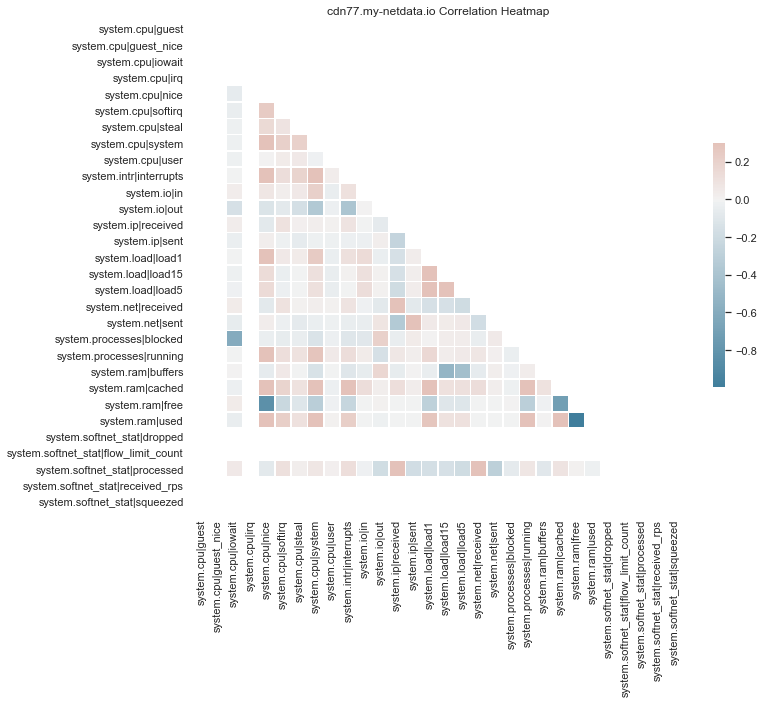

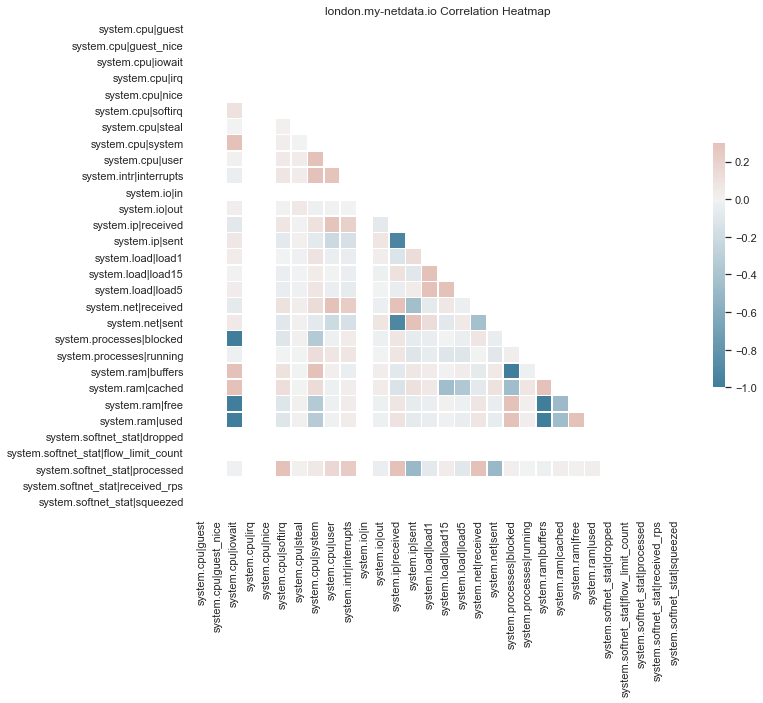

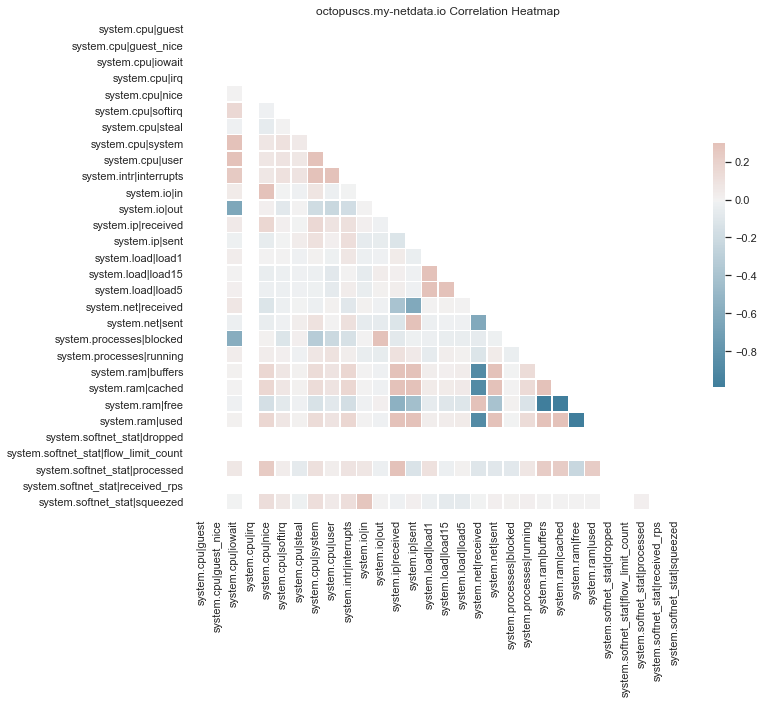

In [5]:
# set some plotting options
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

for host in df.index.unique(0):    
    corr = df.loc[host].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(
        corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
        square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title(f'{host} Correlation Heatmap')